# Univariate, bivariate and multivariate charts

The purpose of this notebook is to look at the relationships between the regressors and the target variable.

In [1]:
pwd

'/Users/Monika/GitHub/Iowa Liquor Sales/LiquorSales/data'

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [128]:
dff= pd.read_csv('Hy_vee_clean.csv', index_col= None)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [129]:
dff.shape

(6458510, 44)

In [130]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6458510 entries, 0 to 6458509
Data columns (total 44 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Unnamed: 0                int64  
 1   invoice_number            object 
 2   date                      object 
 3   store_number              int64  
 4   store_name                object 
 5   address                   object 
 6   city                      object 
 7   zip_code                  float64
 8   store_location            object 
 9   county_number             float64
 10  county                    object 
 11  category                  float64
 12  category_name             object 
 13  vendor_number             float64
 14  vendor_name               object 
 15  item_number               object 
 16  item_description          object 
 17  pack                      int64  
 18  bottle_volume_(ml)        int64  
 19  state_bottle_cost         float64
 20  state_bottle_retail     

Creating a new dataframe in which contains all the location descriptions.

In [131]:
location = dff[['store_number', 'store_name', 'address', 'city', 'zip_code', 'store_location', 'county_number', 'county']]

In [132]:
#computer correlation matrix
correlation = location.corr()

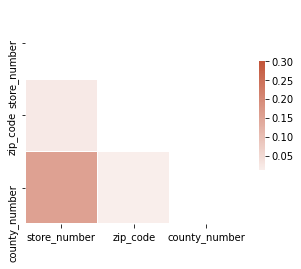

In [133]:
mask = np.triu(np.ones_like(correlation, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The heatmap only shows numerical variables. Also - heatmap doesn't make sense because it evaluates zip code as and store numbers as a continuous variable as opposed to a categorical one. For a meaningful result, I would have to convert all zipcodes to dummy variables, but that's unnecessary as I will be dropping them anyways.


Need to drop some regressors that have overlapping significance..

- invoice number: unique for each transaction, do not need to keep
- store_name: correlated with store number
- address: also correlated with store number
- store location: also correlated with store number
- county number: correlated with county
- category: correlated with category name
- vendor name: correlated with vendor number
- item description: will keep item number instead
- bottle volume: not interested in bottle volume
- bottles sold: not interested in bottles sold
- volume sold (gallons): will keep volume sold (liters) instead




In [134]:
dff = dff.drop(['Unnamed: 0','invoice_number', 'store_name', 'address', 'store_location', 'county_number', 'category', 'vendor_name', 'item_description', 'bottle_volume_(ml)', 'bottles_sold', 'volume_sold_(gallons)'], axis =1)
dff.shape

(6458510, 32)

In [135]:
dff.columns

Index(['date', 'store_number', 'city', 'zip_code', 'county', 'category_name',
       'vendor_number', 'item_number', 'pack', 'state_bottle_cost',
       'state_bottle_retail', 'sale_(dollars)', 'volume_sold_(liters)', 'year',
       'month', 'initial claims', 'imported', 'rum', 'vodka', 'liquer',
       'brandy', 'whiskey', 'tequila', 'cocktail', 'gin', 'scotch', 'creme',
       'amaretto', 'bourbon', 'spirit', 'other', 'general_alcohol_category'],
      dtype='object')

We are now left with 32 categorical variables.

This dataset is going to not contain the dummy variables for general_alcohol_category

In [136]:
dff_1 = dff[['date', 'store_number', 'city', 'zip_code', 'county', 'category_name', 'vendor_number', 'item_number', 'pack', 'state_bottle_cost', 'state_bottle_retail', 'sale_(dollars)', 'volume_sold_(liters)', 'year', 'month', 'initial claims', 'general_alcohol_category']]
dff_1.shape

(6458510, 17)

## Bivariate charts

- #### Date

First we need to take a look at the transactions over time. Taking a closer look at the 'date' column...

In [167]:
dff['date'].head()

0    2015-08-31
1    2014-05-23
2    2015-02-17
3    2014-01-20
4    2013-08-14
Name: date, dtype: object

In [171]:
dff['date'] =  pd.to_datetime(dff['date'], format='%Y-%m-%d')

In [172]:
dff_2=dff_1.groupby(['date'])[['volume_sold_(liters)']].count().sort_values(by = 'date', ascending=False)

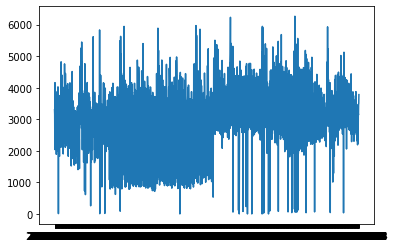

In [173]:
Volume = dff_2['volume_sold_(liters)']


plt.plot(Volume)

A slightly better version...

In [175]:
dfft = dff['sale_(dollars)'].groupby([dff['date'].dt.date]).sum()
dfft.index = pd.to_datetime(dfft.index)

Text(0, 0.5, 'Revenue in dollars')

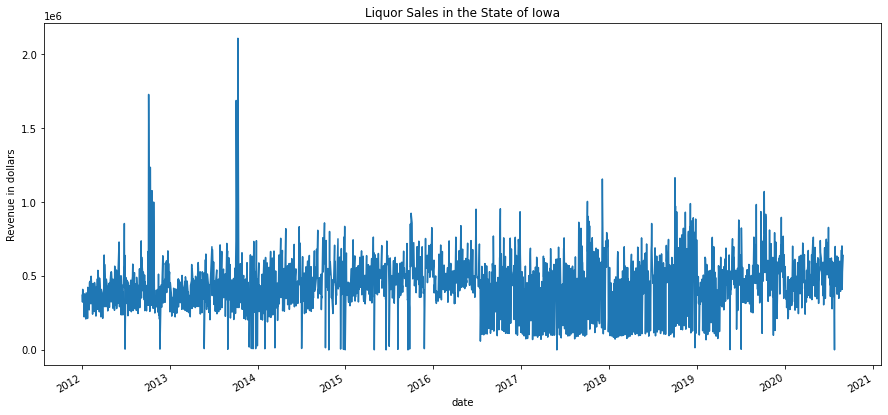

In [176]:
fig, ax = plt.subplots(figsize=(15,7))
dfft.plot(ax=ax)
plt.title('Liquor Sales in the State of Iowa')
plt.ylabel('Revenue in dollars')

-  #### Store Number

Store number needs to be converted to a categorical variable.

In [177]:
dff['store_number'] = dff['store_number'].astype('object')
dff['store_number'].nunique()

178

As the number of stores is really large, I will be looking at the store with the highest volume sales.

,mean,std
store_number,,
2500,7.667822,20.365975
2501,9.721031,25.831504
2502,12.040934,34.376281
2503,7.671571,32.014869
2505,9.213167,38.509062
...,...,...
2715,27.430876,146.537450
2716,14.278807,30.227606
2717,0.264286,0.100178


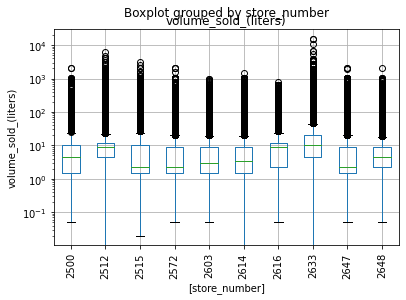

In [141]:
#Plot of volume sold per store
dff_0=dff.groupby(['store_number'])[['volume_sold_(liters)']].count().sort_values(by = 'volume_sold_(liters)', ascending=False)[0:10]
dff_3 = dff[dff['store_number'].isin(dff_0.index.values.tolist())]

dff_3.boxplot(column=['volume_sold_(liters)'],by = ['store_number'], rot=90).set_yscale('log')
plt.ylabel("volume_sold_(liters)")
pd.DataFrame(dff.groupby(['store_number'])['volume_sold_(liters)'].describe().loc[:,['mean','std']])

- #### City

There are 88 different cities

In [142]:
dff['city'].nunique()


88

,mean,std
city,,
ALBIA,7.448929,7.490798
ALGONA,10.344858,32.581877
ALTOONA,10.374093,33.450087
AMES,7.999941,22.331663
ANKENY,10.234322,30.125821
...,...,...
WAVERLY,8.581183,30.513859
WEBSTER CITY,6.198363,32.816049
WEST DES MOINES,9.404220,29.066961


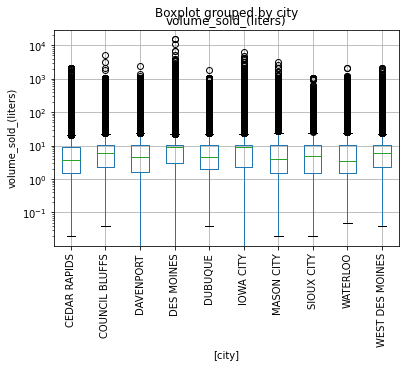

In [143]:
dff_0=dff.groupby(['city'])[['volume_sold_(liters)']].count().sort_values(by = 'volume_sold_(liters)', ascending=False)[0:10]
dff_3 = dff[dff['city'].isin(dff_0.index.values.tolist())]

dff_3.boxplot(column=['volume_sold_(liters)'],by = ['city'], rot=90).set_yscale('log')
plt.ylabel("volume_sold_(liters)")
pd.DataFrame(dff.groupby(['city'])['volume_sold_(liters)'].describe().loc[:,['mean','std']])

The mean volume sales per transaction in each city appear to be homogenous.

- #### Zip Code


In [144]:
dff['zip_code'] = dff['zip_code'].astype('object')

In [147]:
dff.shape

(6458510, 32)

In [148]:
# dff_0=dff.groupby(['zip_code'])[['volume_sold_(liters)']].count().sort_values(by = 'volume_sold_(liters)', ascending=False)[0:10]
# dff_3 = dff[dff['zip_code'].isin(dff_0.index.values.tolist())]

# dff_3.boxplot(column=['volume_sold_(liters)'],by = ['zip_code'], rot=90)
# plt.ylabel("volume_sold_(liters)")
# pd.DataFrame(dff.groupby(['zip_code'])['volume_sold_(liters)'].describe().loc[:,['mean','std']])

- #### County

,mean,std
county,,
ADAMS,5.297766,5.712865
ALLAMAKEE,16.974825,37.754759
APPANOOSE,7.047465,23.041682
BENTON,10.817891,25.961434
BLACK HAWK,7.363194,25.330541
...,...,...
WASHINGTON,6.997854,31.144932
WAYNE,7.267525,4.635150
WEBSTER,13.592391,42.831502


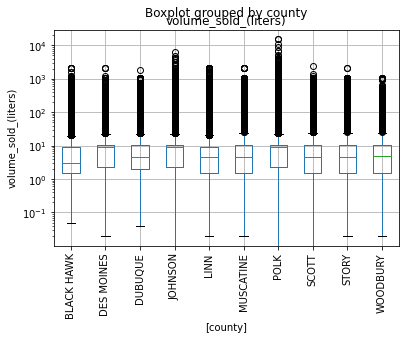

In [152]:
dff_0=dff.groupby(['county'])[['volume_sold_(liters)']].count().sort_values(by = 'volume_sold_(liters)', ascending=False)[0:10]
dff_3 = dff[dff['county'].isin(dff_0.index.values.tolist())]

dff_3.boxplot(column=['volume_sold_(liters)'],by = ['county'], rot=90).set_yscale('log')
plt.ylabel("volume_sold_(liters)")
pd.DataFrame(dff.groupby(['county'])['volume_sold_(liters)'].describe().loc[:,['mean','std']])

- #### Category Name

,mean,std
category_name,,
100 PROOF VODKA,9.664684,18.359547
100% AGAVE TEQUILA,5.449455,13.574638
AGED DARK RUM,4.916330,8.246610
AMARETTO - IMPORTED,9.828947,3.602320
AMERICAN ALCOHOL,9.008856,5.250240
...,...,...
WATERMELON SCHNAPPS,8.899316,11.867725
WHISKEY LIQUEUR,11.201833,35.492048
WHITE CREME DE CACAO,4.069006,3.810397


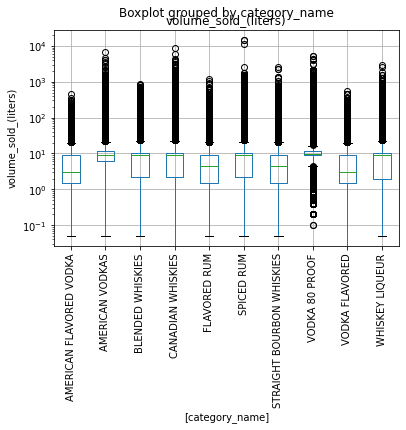

In [149]:
dff_0=dff.groupby(['category_name'])[['volume_sold_(liters)']].count().sort_values(by = 'volume_sold_(liters)', ascending=False)[0:10]
dff_3 = dff[dff['category_name'].isin(dff_0.index.values.tolist())]

dff_3.boxplot(column=['volume_sold_(liters)'],by = ['category_name'], rot=90).set_yscale('log')
plt.ylabel("volume_sold_(liters)")
pd.DataFrame(dff.groupby(['category_name'])['volume_sold_(liters)'].describe().loc[:,['mean','std']])

Again, these are likely sold in different sized bottles, which is where the variation comes from.

- #### Vendor Number

This code isn't working for some reason

In [153]:
dff['vendor_number'] = dff['vendor_number'].astype('object')

In [155]:
dff_0=dff.groupby(['vendor_number'])[['volume_sold_(liters)']].count().sort_values(by = 'volume_sold_(liters)', ascending=False)[0:10]
dff_3 = dff[dff['vendor_number'].isin(dff_0.index.values.tolist())]

dff_3.boxplot(column=['volume_sold_(liters)'],by = ['vendor_number'], rot=90)
plt.ylabel("volume_sold_(liters)")
pd.DataFrame(dff.groupby(['vendor_number'])['volume_sold_(liters)'].describe().loc[:,['mean','std']])

- #### Item Number

In [156]:
dff['item_number'] = dff['item_number'].astype('object')

,mean,std
vendor_number,,
10.0,4.488439,5.053752
27.0,199.060000,NaN
33.0,12.000000,NaN
35.0,8.157353,20.826684
51.0,9.000000,NaN
...,...,...
969.0,2.200806,1.687049
971.0,3.667416,3.707178
977.0,3.533654,3.239822


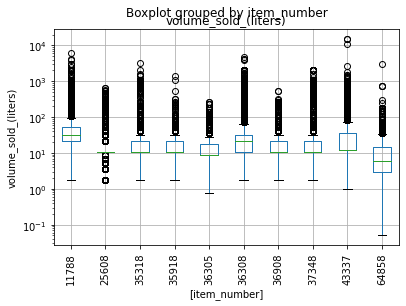

In [158]:
dff_0=dff.groupby(['item_number'])[['volume_sold_(liters)']].count().sort_values(by = 'volume_sold_(liters)', ascending=False)[0:10]
dff_3 = dff[dff['item_number'].isin(dff_0.index.values.tolist())]

dff_3.boxplot(column=['volume_sold_(liters)'],by = ['item_number'], rot=90).set_yscale('log')
plt.ylabel("volume_sold_(liters)")
pd.DataFrame(dff.groupby(['vendor_number'])['volume_sold_(liters)'].describe().loc[:,['mean','std']])

- #### Pack

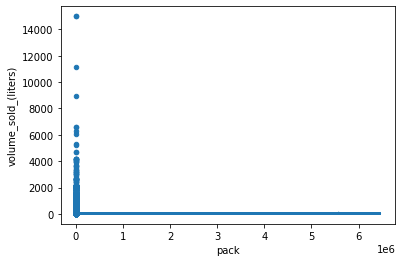

In [159]:
# generate x-values for your regression line (two is sufficient)
x = dff.pack
# scatter-plot data
ax = dff.plot(x='pack', y='volume_sold_(liters)', kind='scatter')
# plot regression line on the same axes, set x-axis limits
ax.plot(x)

- #### State Bottle Cost

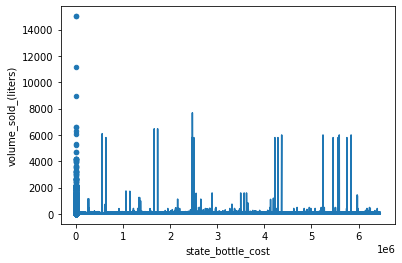

In [160]:
# generate x-values for your regression line (two is sufficient)
x = dff.state_bottle_cost
# scatter-plot data
ax = dff.plot(x='state_bottle_cost', y='volume_sold_(liters)', kind='scatter')
# plot regression line on the same axes, set x-axis limits
ax.plot(x)

- #### State Bottle Retail

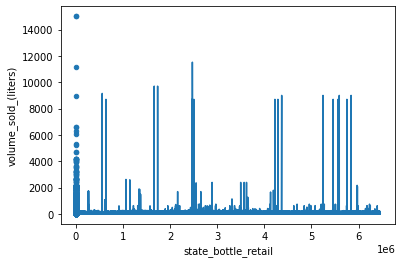

In [161]:
# generate x-values for your regression line (two is sufficient)
x = dff.state_bottle_retail
# scatter-plot data
ax = dff.plot(x='state_bottle_retail', y='volume_sold_(liters)', kind='scatter')
# plot regression line on the same axes, set x-axis limits
ax.plot(x)

- #### Sale (dollars)

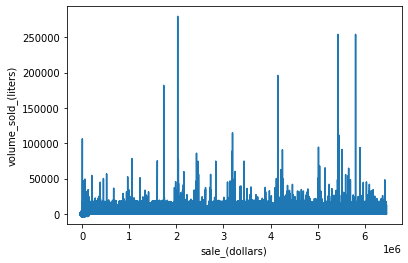

In [163]:
# generate x-values for your regression line (two is sufficient)
x = dff['sale_(dollars)']
# scatter-plot data
ax = dff.plot(x='sale_(dollars)', y='volume_sold_(liters)', kind='scatter')
# plot regression line on the same axes, set x-axis limits
ax.plot(x)

- #### General Alcohol Category

The below boxplot shows volume sold in liters by general alcohol category.

,mean,std
general_alcohol_category,,
amaretto,7.601017,6.555001
bourbon,3.698150,5.221423
brandy,4.578428,6.416288
cocktail,11.789429,20.928861
creme,4.088625,4.006325
gin,7.407693,8.913832
other,6.819694,14.681247
rum,11.329480,43.682226
scotch,3.098107,6.096262


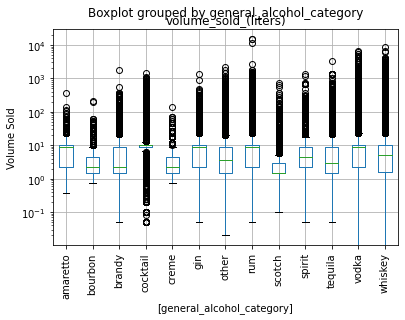

- #### Unemployment

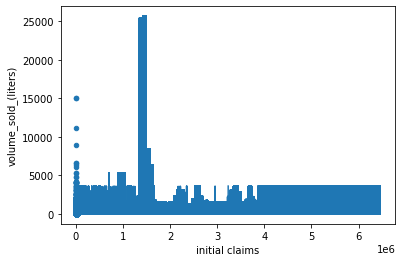

In [165]:
# generate x-values for your regression line (two is sufficient)
x = dff['initial claims']
# scatter-plot data
ax = dff.plot(x='initial claims', y='volume_sold_(liters)', kind='scatter')
# plot regression line on the same axes, set x-axis limits
ax.plot(x)

## Univariate Charts

- #### Unemployment Claims

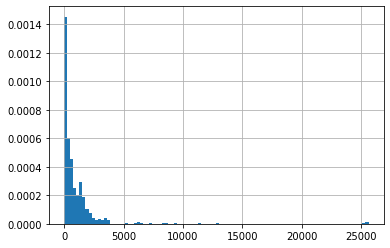

In [181]:
ser = dff['initial claims']
ser.hist(density=1, bins=100)

- #### Volume Sold (Liters)

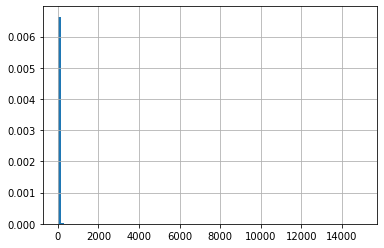

In [182]:
ser = dff['volume_sold_(liters)']
ser.hist(density = 1, bins=100)

## Statistical Tests

In [183]:
dff.columns

Index(['date', 'store_number', 'city', 'zip_code', 'county', 'category_name',
       'vendor_number', 'item_number', 'pack', 'state_bottle_cost',
       'state_bottle_retail', 'sale_(dollars)', 'volume_sold_(liters)', 'year',
       'month', 'initial claims', 'imported', 'rum', 'vodka', 'liquer',
       'brandy', 'whiskey', 'tequila', 'cocktail', 'gin', 'scotch', 'creme',
       'amaretto', 'bourbon', 'spirit', 'other', 'general_alcohol_category'],
      dtype='object')

In [184]:
dff_dummies = dff[['imported', 'rum', 'vodka', 'liquer', 'brandy', 'whiskey', 'tequila', 'cocktail', 'gin', 'scotch', 'creme', 'amaretto', 'bourbon', 'spirit', 'other']]

,mean,std
general_alcohol_category,,
amaretto,7.601017,6.555001
bourbon,3.698150,5.221423
brandy,4.578428,6.416288
cocktail,11.789429,20.928861
creme,4.088625,4.006325
gin,7.407693,8.913832
other,6.819694,14.681247
rum,11.329480,43.682226
scotch,3.098107,6.096262


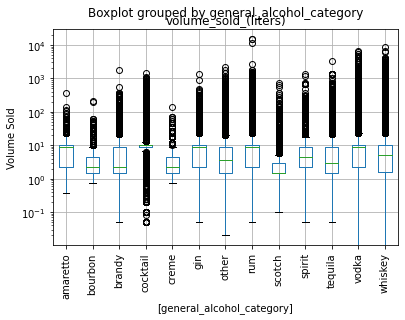

In [186]:
dff.boxplot(column=['volume_sold_(liters)'],by = ['general_alcohol_category'], rot=90).set_yscale('log')
plt.ylabel("Volume Sold")
pd.DataFrame(dff.groupby( ['general_alcohol_category'])['volume_sold_(liters)'].describe().loc[:,['mean','std']])

Creme and Bourbon look like they have similar distributions on the chart.
I'm going to see if that is true.

In [190]:
data1 = dff[dff['general_alcohol_category'] == 'creme']['volume_sold_(liters)']
data2 = dff[dff['general_alcohol_category'] == 'bourbon']['volume_sold_(liters)']

In [193]:
# calculate means
mean1, mean2 = data1.mean(), data2.mean()

In [194]:
# calculate sample standard deviations
std1, std2 = data1.std(), data2.std()

In [198]:
# calculate standard errors
n1, n2 = len(data1), len(data2)
se1, se2 = std1/np.sqrt(n1), std2/np.sqrt(n2)

In [199]:
# standard error on the difference between the samples
sed = np.sqrt(se1**2.0 + se2**2.0)

In [209]:
# calculate the t statistic
t_stat = (mean1 - mean2) / sed
t_stat

5.368087709411032

In [201]:
# degrees of freedom
df = n1 + n2 - 2

In [205]:
# calculate the critical value
alpha = 0.05
cv = scipy.stats.t.ppf(1.0 - alpha, df)

In [208]:
# calculate the p-value
p = (1 - scipy.stats.t.cdf(abs(t_stat), df)) * 2
print(p)

8.04901481021858e-08


p-value is small so we reject the null hypothesis that the two means are equal